In [3]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as pxg
import matplotlib.pyplot as plt

In [4]:
df_tweet=pd.read_excel("/content/covid-19-mortality-within-28-days-of-diagnosis.xlsx")#,delimiter=';')
df_tweet.head()

,areaName,date,7 day rolling death count
0,Leicester,2023-03-29,3
1,Leicester,2023-03-27,3
2,Leicester,2023-03-26,3
3,Leicester,2023-03-24,3
4,Leicester,2023-03-23,3


# Date filter

In [5]:
df_tweet['year'] = pd.DatetimeIndex(df_tweet['date']).year
df_tweet['Month'] = pd.DatetimeIndex(df_tweet['date']).month

In [6]:
df_tweet.sample(10)

,areaName,date,7 day rolling death count,year,Month
152,Leicester,2022-03-06,2,2022,3
729,Leicester,2021-06-24,0,2021,6
763,Leicester,2021-03-27,7,2021,3
619,Leicester,2022-06-27,3,2022,6
238,Leicester,2022-11-10,4,2022,11
1080,Leicester,2020-05-28,11,2020,5
587,Leicester,2022-10-02,3,2022,10
208,Leicester,2023-02-13,5,2023,2
408,Leicester,2021-04-27,3,2021,4
876,Leicester,2020-04-09,38,2020,4


In [7]:
month_map = {1:'January',
             2:'February',
             3:'March',
             4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October',
             11:'November',
             12:'December'
             }

In [8]:
df_tweet['Month_Name']=df_tweet['Month'].apply(lambda v: month_map[v])

In [9]:
df_tweet.sample(6)

,areaName,date,7 day rolling death count,year,Month,Month_Name
915,Leicester,2021-08-27,8,2021,8,August
8,Leicester,2023-03-17,0,2023,3,March
512,Leicester,2020-07-07,6,2020,7,July
292,Leicester,2022-05-03,4,2022,5,May
959,Leicester,2021-04-07,2,2021,4,April
321,Leicester,2022-01-28,10,2022,1,January


In [10]:
df_tweet['year'].value_counts()

2022    365
2021    365
2020    280
2023     91
Name: year, dtype: int64

In [11]:
type(df_tweet['year'])

pandas.core.series.Series

## choose month and year

In [12]:
monthss=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [21]:
starting_month_number=1
ending_month_number=11

In [24]:
Months_wanted=[monthss[i] for i in range(starting_month_number-1,ending_month_number)]# months_range.apply(lambda v: month_map[v])#['January','July']
years_wanted=[2021,2022]#[2010,2018,2019]

In [25]:
Months_wanted

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November']

In [26]:
if len(Months_wanted)==0:
  X1=df_tweet.copy()
else:
  X1=df_tweet.loc[df_tweet['Month_Name'].isin(Months_wanted)]

In [27]:
if len(years_wanted)==0:
  X2=X1.copy()
else:
  X2=X1.loc[X1['year'].isin(years_wanted)]

In [28]:
# X1=df_tweet.loc[df_tweet['Month_Name'].isin(Months_wanted)]
# X2=X1.loc[X1['year'].isin(years_wanted)]

In [29]:
X2.head()

,areaName,date,7 day rolling death count,year,Month,Month_Name
49,Leicester,2022-11-29,2,2022,11,November
50,Leicester,2022-11-28,2,2022,11,November
51,Leicester,2022-11-27,2,2022,11,November
52,Leicester,2022-11-22,1,2022,11,November
53,Leicester,2022-11-21,1,2022,11,November


In [30]:
df_1=X2.copy()

In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 49 to 991
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   areaName                   668 non-null    object
 1   date                       668 non-null    object
 2   7 day rolling death count  668 non-null    int64 
 3   year                       668 non-null    int64 
 4   Month                      668 non-null    int64 
 5   Month_Name                 668 non-null    object
dtypes: int64(3), object(3)
memory usage: 36.5+ KB


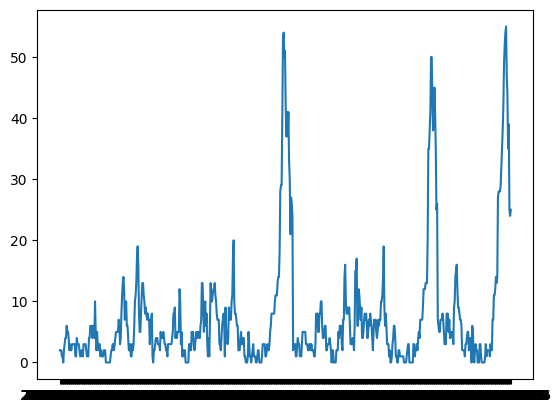

In [32]:
# plt.figure(figsize=(20,5))
plt.plot(df_1['date'],df_1['7 day rolling death count'])

In [33]:
# df_1 = px.df_1.tips()
y=df_1['7 day rolling death count']#Claimant Count'],#Claimant Rate (% of population)
x=df_1['date']#DATE'],
 
plot = pxg.Figure(data=[pxg.Scatter(
    x=x,
    y=y,
    mode='markers',)
])
 
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
 
plot.show()

In [34]:
fig = px.histogram(df_1, x="date", y='7 day rolling death count')#, color='Gender')
fig.show()

In [35]:
plot = pxg.Figure(data=[pxg.Scatter(
	x=df_1['7 day rolling death count'],
	y=df_1['date'],
	mode='markers',)
  # color='Location',)
])

# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			type="buttons",
			direction="left",
			buttons=list([
				dict(
					args=["type", "scatter"],
					label="Scatter Plot",
					method="restyle"
				),
				dict(
					args=["type", "histogram"],
					label="Histogram",
					method="restyle"
				)
			]),
		),
	]
)

plot.show()
